In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

## Load tax data as CSV

In [55]:
df = pd.read_csv("../data/tax-data-2023.5-mit-werbungskosten.csv")
df.head()

,monthly gross income,net income,social security payments,income tax
0,0,0.0,0.0,0.0
1,100,79.0,21.0,0.0
2,200,158.0,42.0,0.0
3,300,237.0,63.0,0.0
4,400,316.0,84.0,0.0


## Fit polynomes to different netto ranges

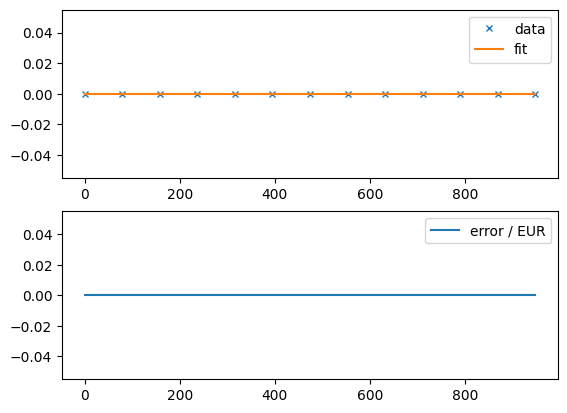

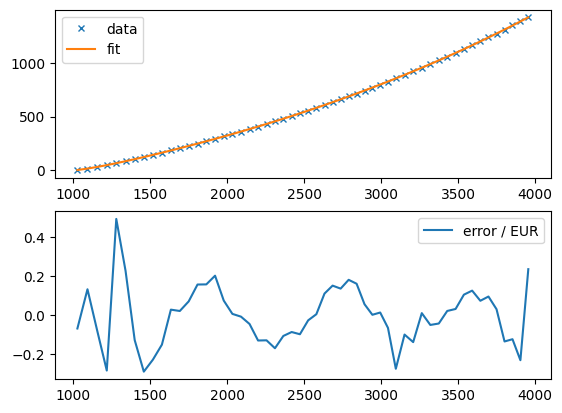

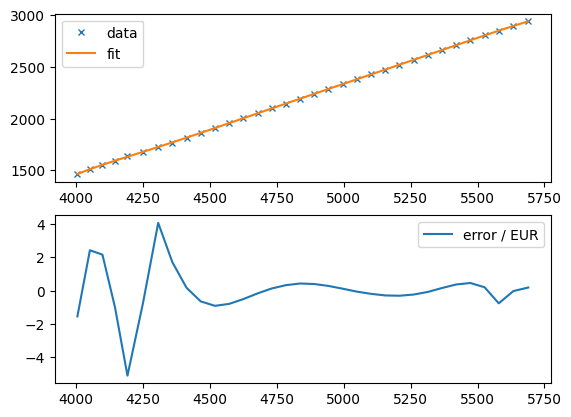

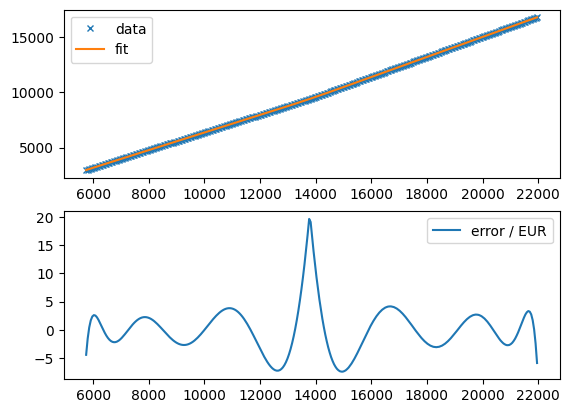

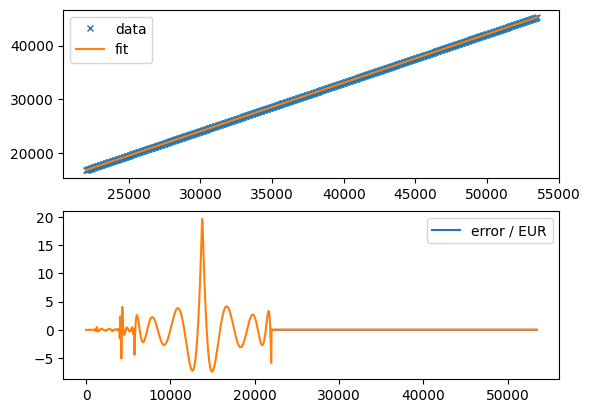

In [56]:
netIncomeRanges = [
    {
        "from": 0,
        "to": 1021,
        "degree": 0,
    },
    {
        "from": 1021,
        "to": 4000,
        "degree": 8,
    },
    {
        "from": 4000,
        "to": 5700,
        "degree": 8,
    },
    {
        "from": 5700,
        "to": 22000,
        "degree": 12,
    },
    {
        "from": 22000,
        "to": 100000,
        "degree": 1,
    }
]

netToTaxPolynomes= []
netIncomeSamples = []
taxSamples = []
estimationSamples = []
estimationErrors = []

for r in netIncomeRanges:
    selector = df['net income'].between(r['from'], r['to'], inclusive='left') 
    netIncomes = df[selector]['net income'].to_numpy()
    taxes = df[selector]['income tax'].to_numpy()
    netIncomeSamples = np.append(netIncomeSamples, netIncomes)
    taxSamples = np.append(taxSamples, taxes)

    poly,residuals,_,_,_ = np.polyfit(netIncomes, taxes, deg=r['degree'], full = True)

    estimations = np.polyval(poly, netIncomes)
    estimationSamples = np.append(estimationSamples, estimations)
    
    fig, axs = plt.subplots(2)
    axs[0].plot(netIncomes, taxes, 'x', markersize=5, label='data')
    axs[0].plot(netIncomes, estimations, label='fit')
    axs[0].legend()

    errors = np.subtract(estimations, taxes)
    estimationErrors = np.append(estimationErrors, errors)
    axs[1].plot(netIncomes, errors, label='error / EUR')
    axs[1].legend()
    
    poly = poly.tolist()
    poly.reverse()
    netToTaxPolynomes.append({
        'from': r['from'],
        'to': r['to'],
        'polynome': poly,
    })
plt.plot(netIncomeSamples, estimationErrors)

## Social Security Estimation

[1.01959353e-26]
[5.60244713]
[2.16892579]
[1.3746929e-21]


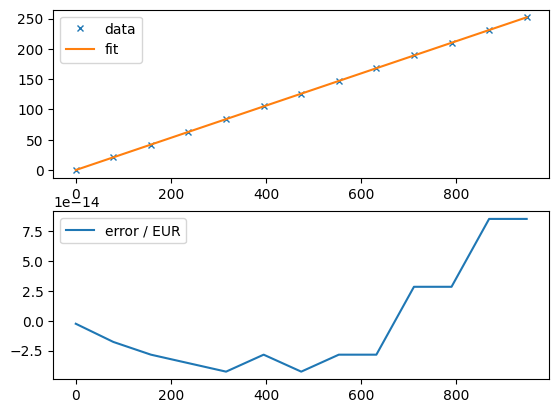

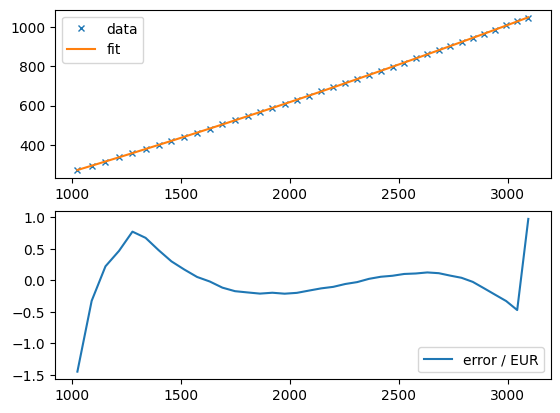

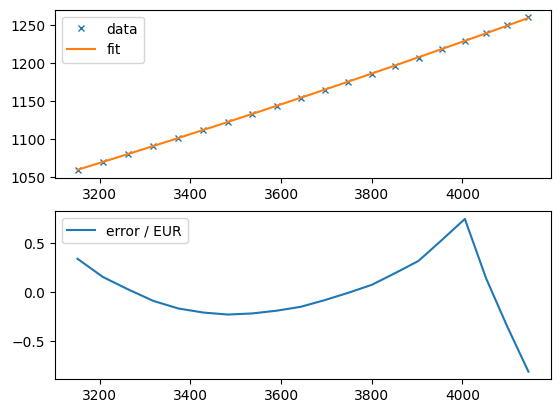

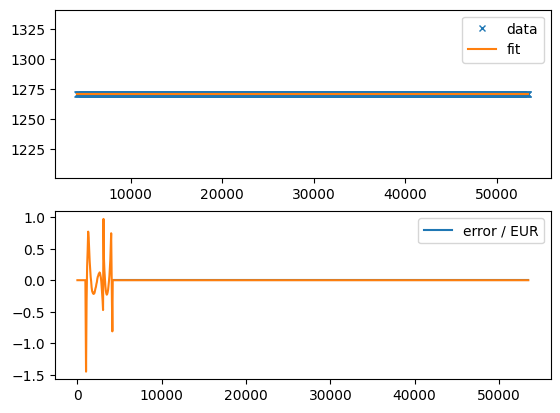

In [57]:
netIncomeRanges = [
    {
        "from": 0,
        "to": 953,
        "degree":2, 
    },
    {
        "from": 953,
        "to": 3142,
        "degree": 2,
    },
    {
        "from": 3142,
        "to": 4192,
        "degree": 2,
    },
    {
        "from": 4192 ,
        "to": 100000,
        "degree": 0,
    },
]

netIncomeSamples = []
socialSecuritySamples = []
estimationSamples = []
estimationErrors = []
socialSecurityPolonomes = []

for r in netIncomeRanges:
    selector = df['net income'].between(r['from'], r['to'], inclusive='left') 
    netIncomes = df[selector]['net income'].to_numpy()
    ssocialPayments = df[selector]['social security payments'].to_numpy()
    netIncomeSamples = np.append(netIncomeSamples, netIncomes)
    socialSecuritySamples = np.append(socialSecuritySamples, ssocialPayments)

    poly,residuals,_,_,_ = np.polyfit(netIncomes, ssocialPayments, deg=r['degree'], full = True)
    print(residuals)

    estimations = np.polyval(poly, netIncomes)
    estimationSamples = np.append(estimationSamples, estimations)
    
    fig, axs = plt.subplots(2)
    axs[0].plot(netIncomes, ssocialPayments, 'x', markersize=5, label='data')
    axs[0].plot(netIncomes, estimations, label='fit')
    axs[0].legend()

    errors = np.subtract(estimations, ssocialPayments)
    estimationErrors = np.append(estimationErrors, errors)
    axs[1].plot(netIncomes, errors, label='error / EUR')
    axs[1].legend()
    
    poly = poly.tolist()
    poly.reverse()
    socialSecurityPolonomes.append({
        'from': r['from'],
        'to': r['to'],
        'polynome': poly,
    })
plt.plot(netIncomeSamples, estimationErrors)

## Export polynomes to be used in JS Library

In [58]:
polynomesJSON = json.dumps({
        "netToTax": netToTaxPolynomes,
        "netToSocialSecurity": socialPaymentsPolynomes,
    })
print(polynomesJSON)

with open("../src/polynomes-mit-werbungskosten.json", "w") as outfile:
    outfile.write(polynomesJSON)

{"netToTax": [{"from": 0, "to": 1021, "polynome": [-0.0]}, {"from": 1021, "to": 4000, "polynome": [1224.4865068275183, -4.494551586587648, 0.00631676838552744, -4.638990197807369e-06, 2.0747386480835356e-09, -5.729907062763124e-13, 9.539072623148743e-17, -8.727718418243321e-21, 3.3457515781258825e-25]}, {"from": 4000, "to": 5700, "polynome": [-68109885.9162739, 110830.40452052116, -78.78572926336273, 0.03195969238024829, -8.092505241180312e-06, 1.3098808176528328e-09, -1.32370319156251e-13, 7.636272141946083e-18, -1.925565966182529e-22]}, {"from": 5700, "to": 22000, "polynome": [-1681197.5646438038, 1824.7129753627903, -0.8884166023721691, 0.0002566258969481694, -4.895864728766341e-08, 6.4996355938781395e-12, -6.158707380216953e-16, 4.1985556275070146e-20, -2.044998422110167e-24, 6.9452189782007e-29, -1.5624009378472232e-33, 2.0921786764255328e-38, -1.262284223778199e-43]}, {"from": 22000, "to": 100000, "polynome": [-3079.653108150575, 0.9038553054862429]}], "netToSocialSecurity": [{"f